### Assignment 3 - Juan Esteban Rincón Poveda

Using Pandas and Statsmodels write a Jupyter Notebook that: 

1. Uses the data from the Maddison Project to plot the evolution of total population across the world. 
2. Plots the evolution of the share of the world population by countries and WB regions.
3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.
4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database](https://www.mortality.org/) and plots its evolution.
5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Submit your notebook as a ``pull request`` to the course's github repository.

### 1. Uses the data from the Maddison Project to plot the evolution of total population across the world.

In [1]:
import pandas as pd
import numpy as np
import os


pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    
    
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

In [2]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [3]:
pop = maddison_new_region
pop['year'] = pop.year.astype(int)
pop['population'] = pop['pop']

In [4]:
pop['year'] = pop.year.astype(int)

In [70]:
popworld = pop.loc[pop.region_name=='World']
popworld = popworld.pivot_table(index='year',columns='region_name',values='population')
popworld

region_name,World
year,
1870,1013941.0
1890,1292040.0
1913,1627706.0
...,...
2014,7152269.0
2015,7231375.0
2016,7311687.0


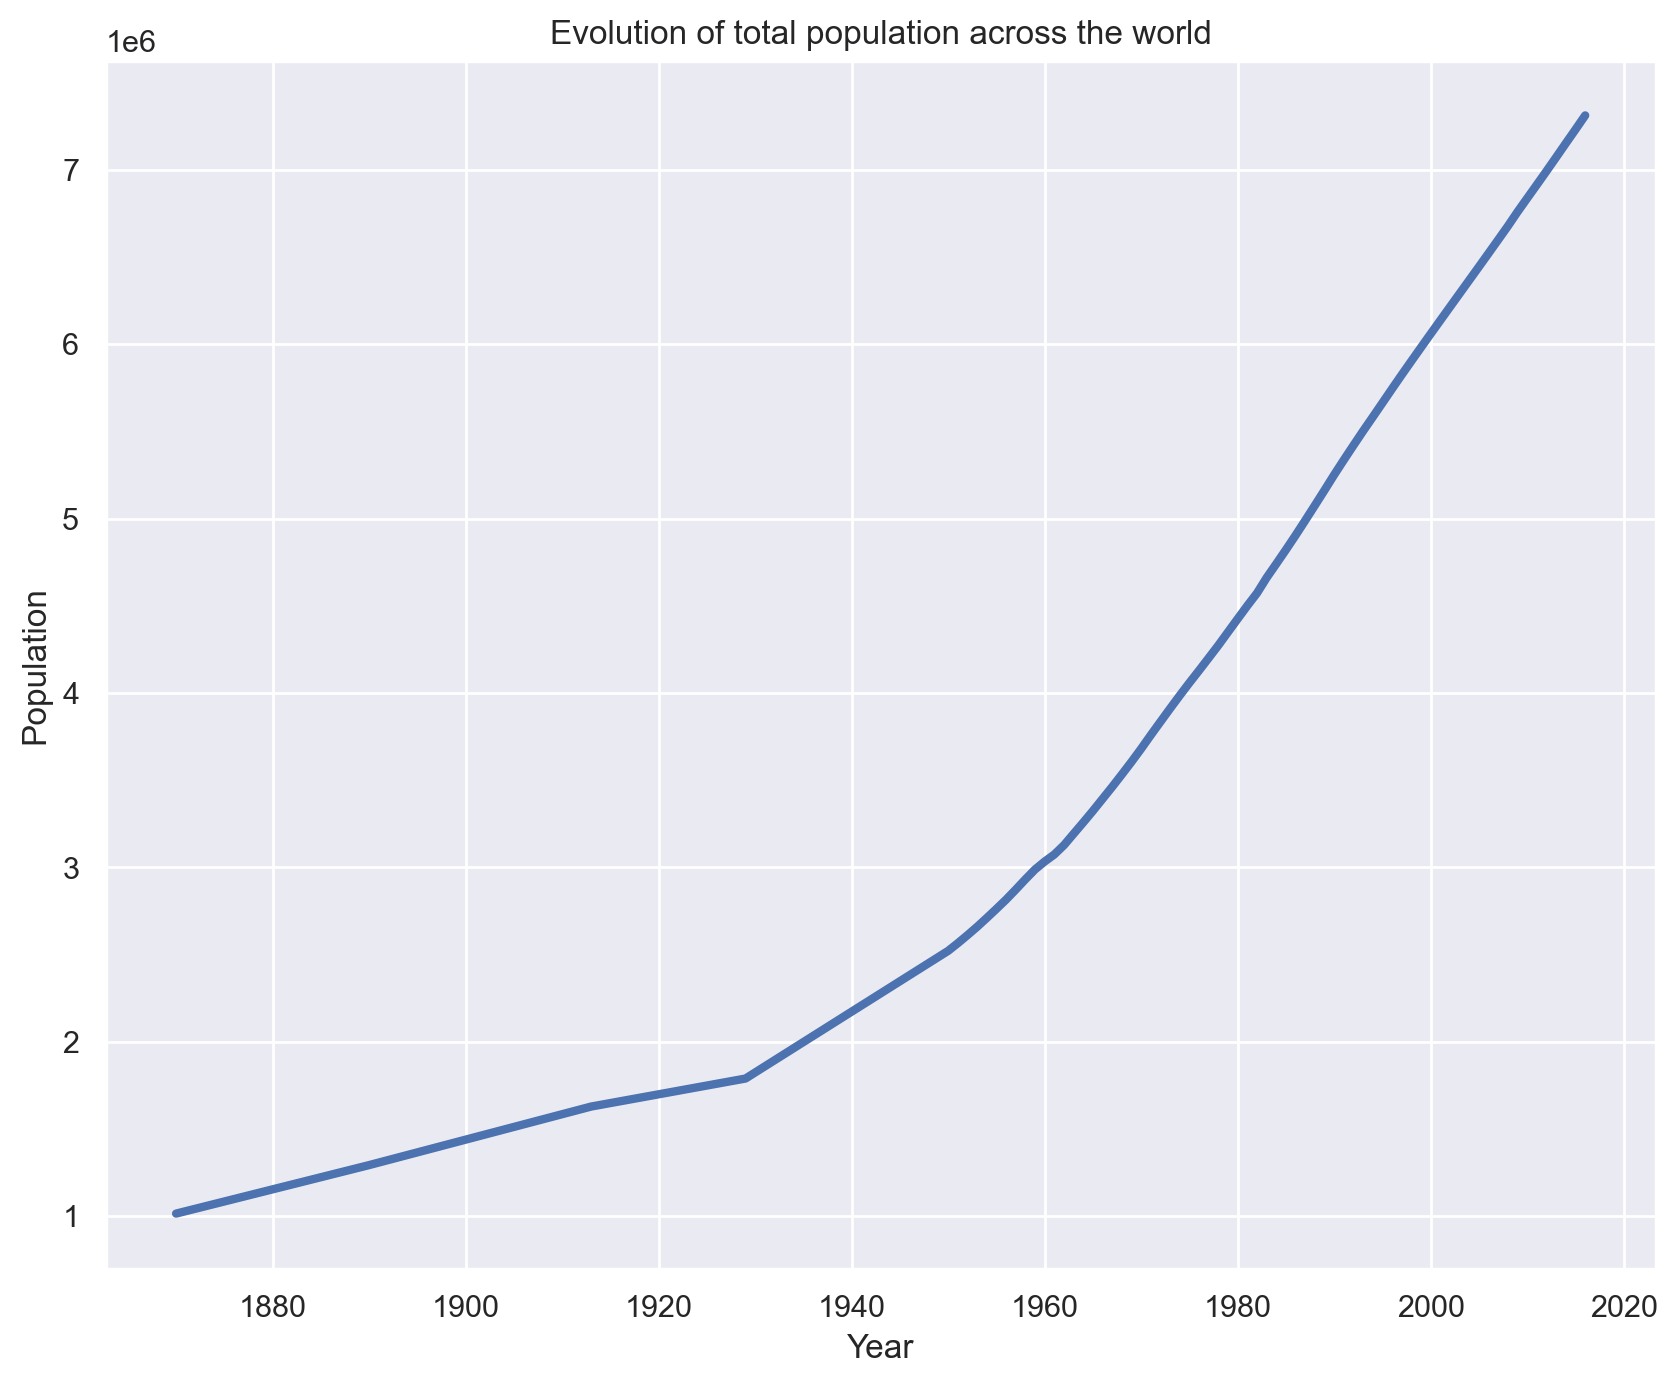

In [6]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
plt.style.use('seaborn-colorblind')
plt.plot(popworld,linewidth=3,label='World Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Evolution of total population across the world')
plt.show()

### 2. Plots the evolution of the share of the world population by countries and WB regions.

In [133]:
import requests
import pandas as pd
import pandas_datareader as web


session = requests.Session()
session.verify = False

In [134]:
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [135]:
import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    import urllib3,certifi
https = urllib3.PoolManager( cert_reqs='CERT_REQUIRED',
 ca_certs=certifi.where(),)  

from time import sleep
from pandas_datareader import data, wb
import wbpy 
from pprint import pprint

In [137]:
import world_bank_data as wb
pd.set_option('display.max_rows', 6)

In [138]:
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()

In [166]:
wbcountries.reset_index(level=0, inplace=True)

In [167]:
wbcountries.rename(columns={'id':'countrycode'}, inplace=True)
wbcountries = wbcountries.drop(['level_0', 'index'], axis=1)

In [145]:
##### Maddison

In [146]:
popcountry=maddison_new.merge(popworld, on='year')

In [147]:
popcountry['share']=(popcountry['pop']/popcountry['World'])*100

In [148]:
popcountry2 = popcountry.pivot_table(index='year',columns='country',values='share',aggfunc='sum')

In [149]:
popregion = popcountry[['countrycode', 'country', 'year', 'pop',
                        'World']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])

In [150]:
popregion['share']=(popregion['pop']/popregion['World'])*100

In [151]:
popregion2 = popregion.pivot_table(index='year',columns='region',values='share',aggfunc='sum')

Text(0.5, 1.0, 'Share of world population by region')

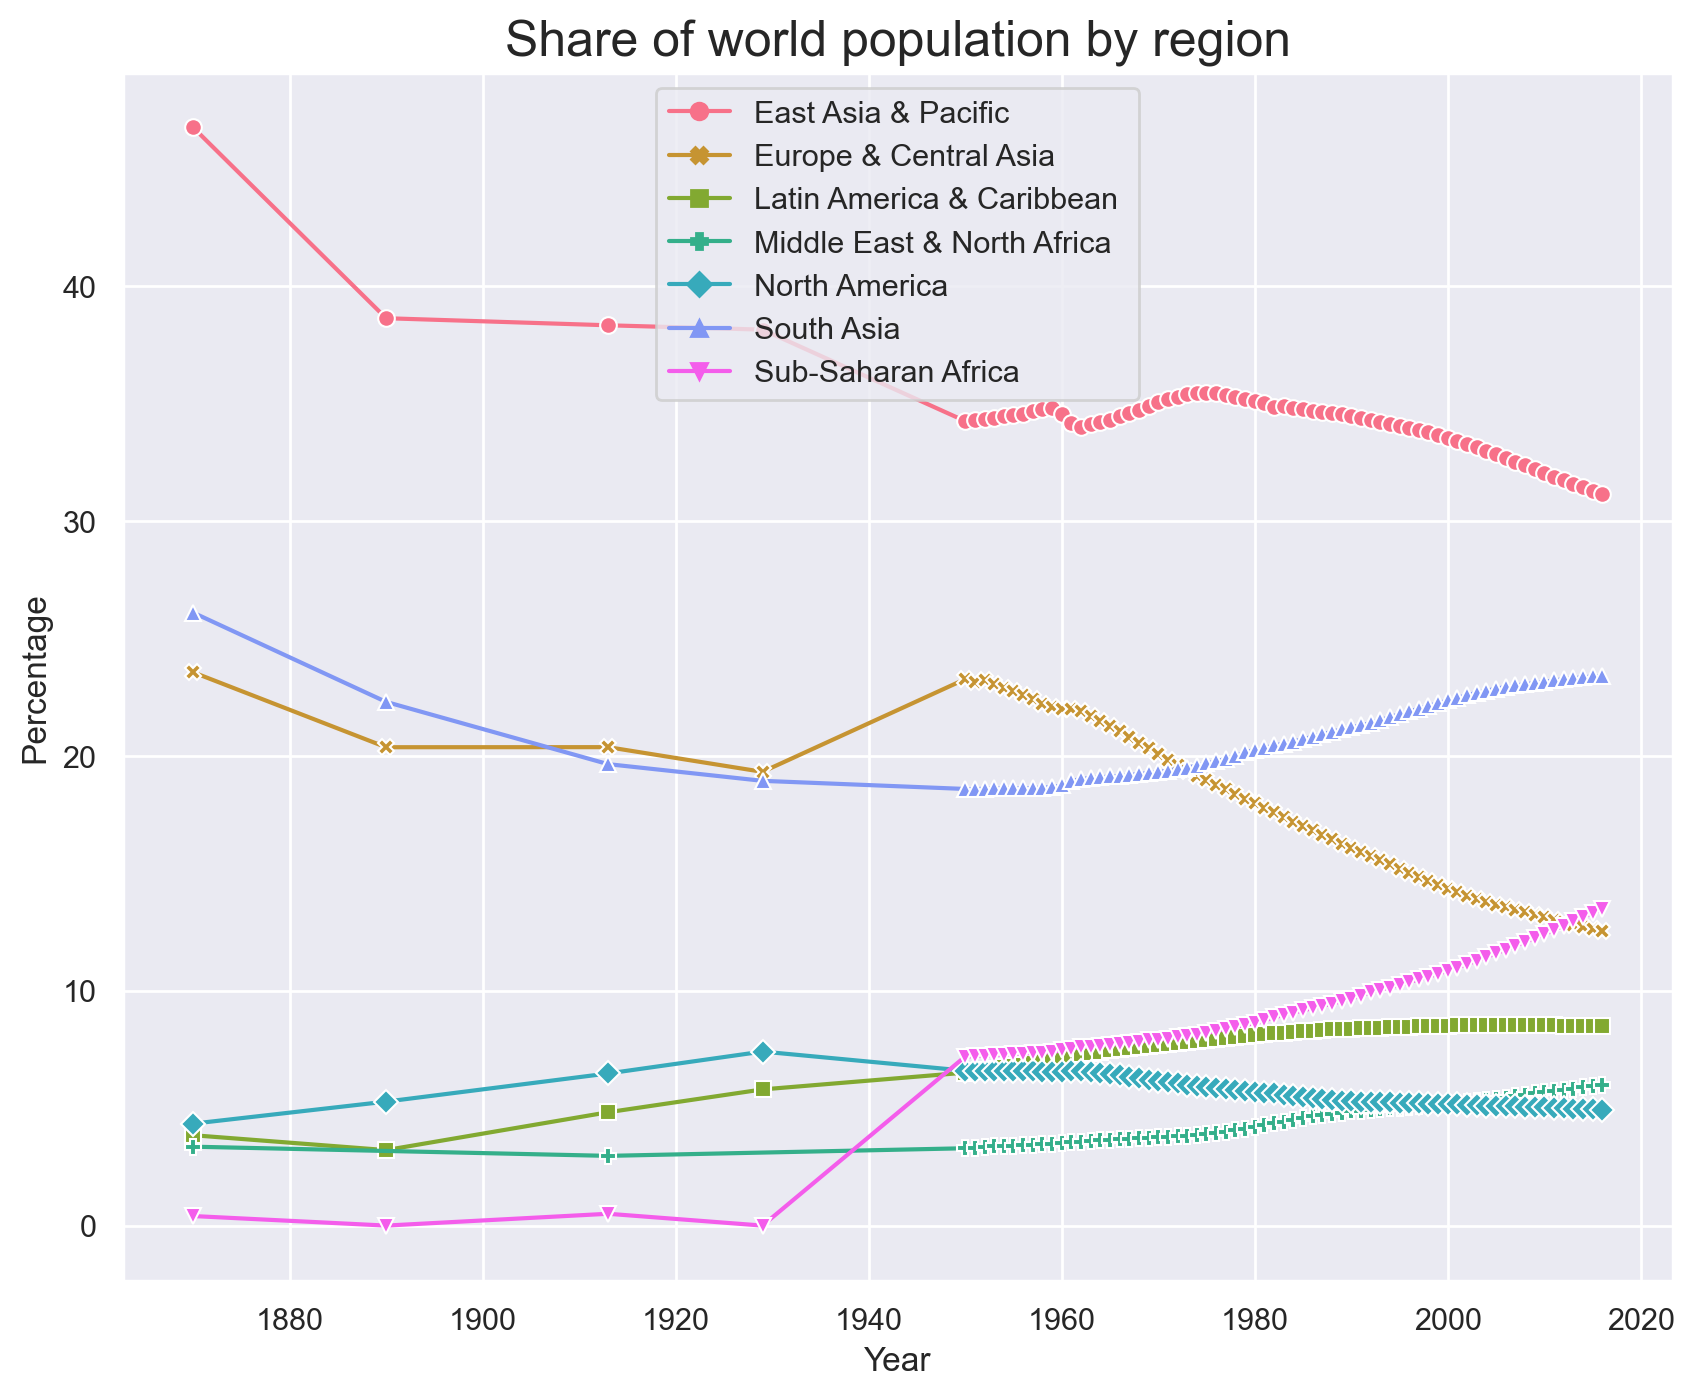

In [152]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=popregion2 , alpha=1, style='country', dashes=False, markers=True)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title("Share of world population by region", fontsize=18)

### 3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.

In [402]:
fertility = 'SP.DYN.TFRT.IN'
mortality = 'SP.DYN.CDRT.IN'
lifeexp = 'SP.DYN.LE00.IN'

In [408]:
world2= wb.get_series('SP.DYN.CDRT.IN',id_or_value='id', simplify_index=True)
world2 = world2.to_frame()
world2=world2.reset_index()
world2 = world2.drop(['Year','Country'],axis=1)


In [409]:
world1= wb.get_series('SP.DYN.TFRT.IN',id_or_value='id', simplify_index=True)

world1 = world1.to_frame()
world1=world1.reset_index()

In [410]:
world3= wb.get_series('SP.DYN.LE00.IN',id_or_value='id', simplify_index=True)
world3 = world3.to_frame()
world3=world3.reset_index()
world3 = world3.drop(['Year','Country'],axis=1)


In [411]:
world1['SP.DYN.LE00.IN'] = world3
world1['SP.DYN.CDRT.IN'] = world2

In [412]:
world1['Year']=pd.to_numeric(world1.Year)
worldP = worldP.drop(['level_0'], axis=1)

KeyError: "['level_0'] not found in axis"

In [415]:
world1.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
world1.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
world1.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)

In [407]:
worldP = world1.loc[world1.Country=='WLD']
worldA = worldP.loc[worldP.Year!=2019]

In [ ]:
worldA = worldA.pivot_table(index='Year',columns='Country',aggfunc='sum')

In [372]:
worldA.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldA.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldA.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)
worldA

,mortality,lifeex,fertility
Country,WLD,WLD,WLD
Year,,,
1960,17.714523,52.578207,4.980164
1961,14.999311,53.079382,5.002610
1962,13.952690,53.496641,5.024376
1963,13.735706,54.021867,5.044543
1964,13.790592,54.691761,5.055467
1965,13.205631,55.350941,5.039725
1966,12.863195,56.082435,4.990957
1967,12.600419,56.787124,4.972429


Text(0.5, 1.0, 'Fertility, Mortality and Life expectancy')

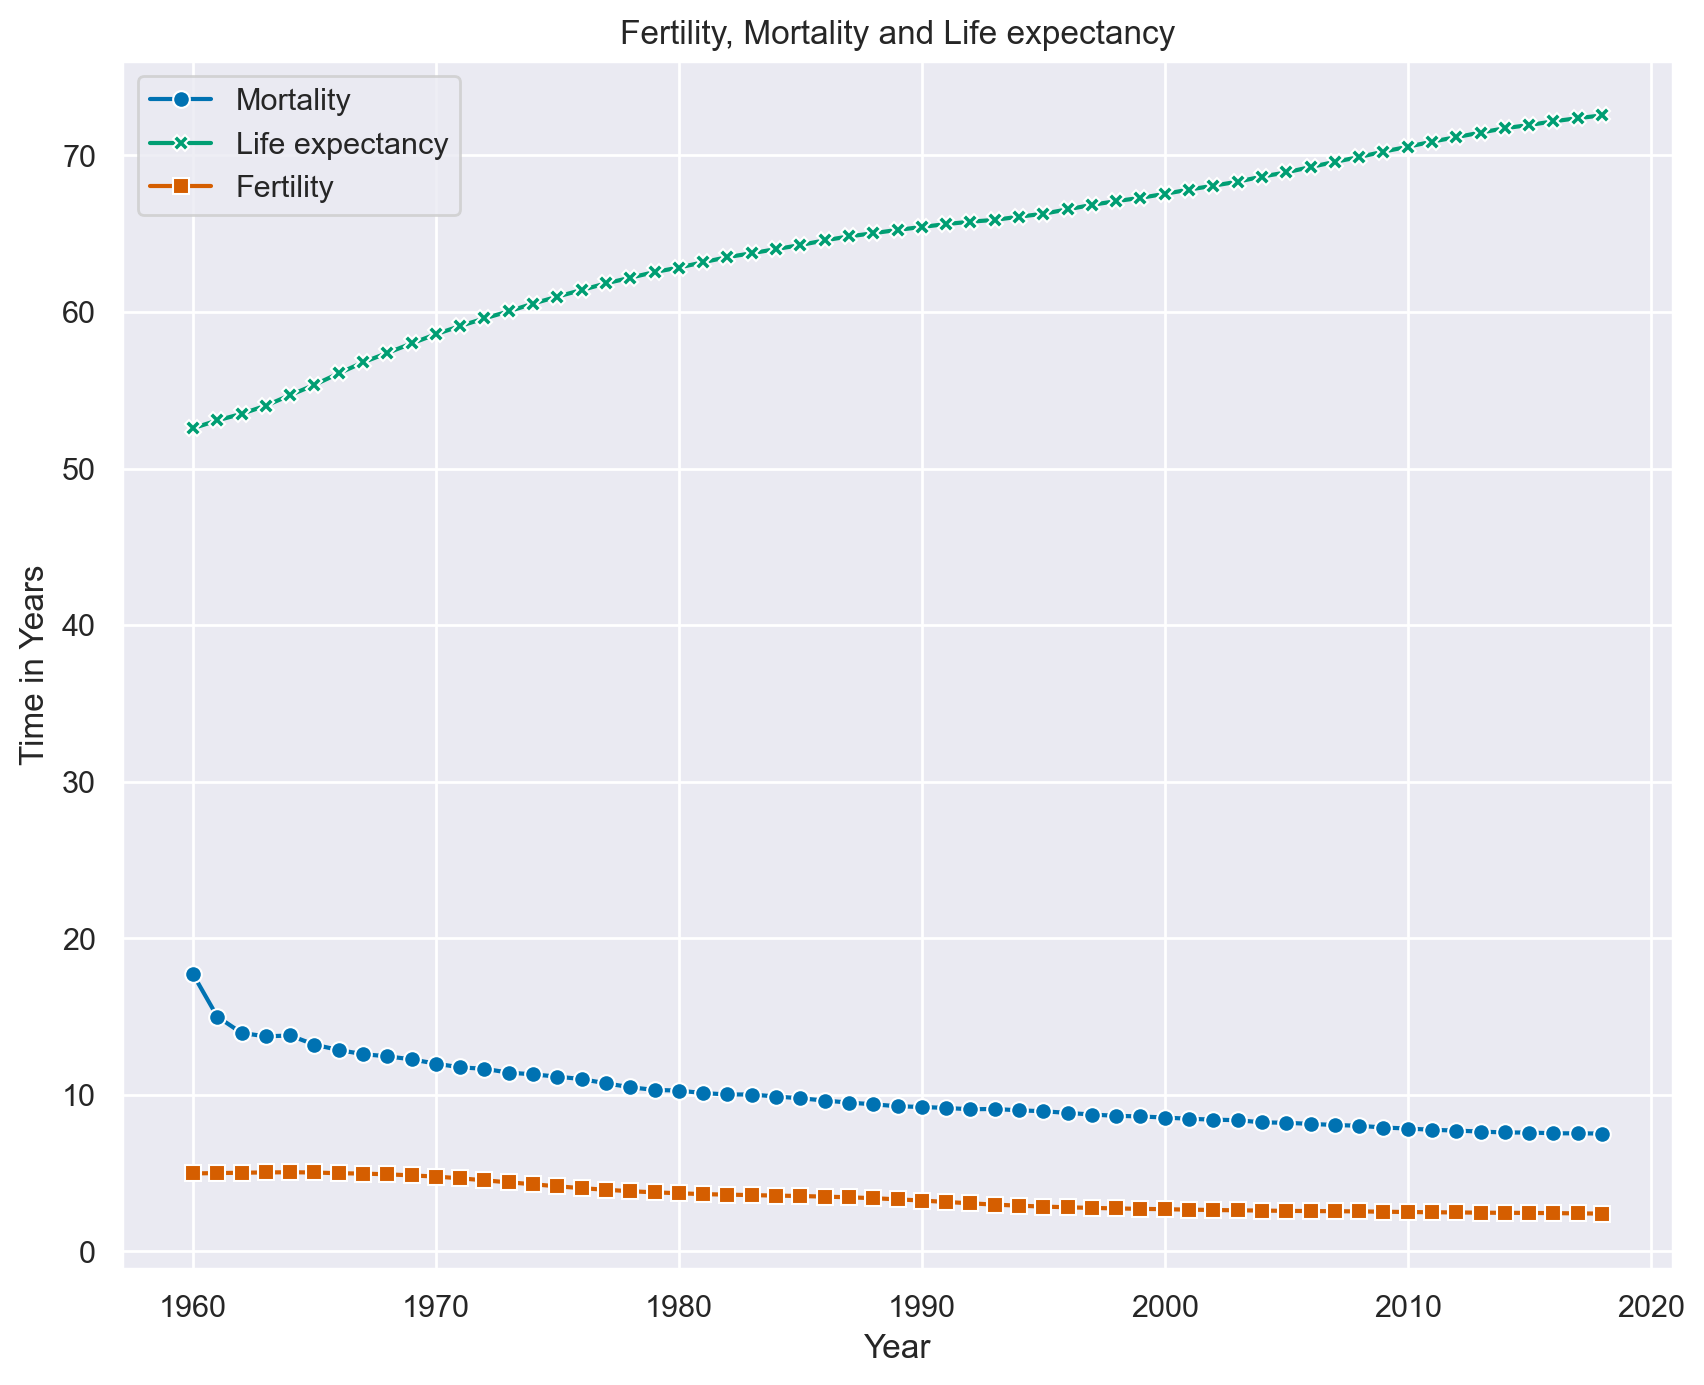

In [376]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=worldA , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['Mortality','Life expectancy','Fertility'])
ax.set_xlabel('Year')
ax.set_ylabel('Time in Years')
ax.set_title("Fertility, Mortality and Life expectancy")


### 4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database] and plot

In [161]:
mortality = pd.read_csv(pathout + 'stmf.csv', skiprows=2)

In [171]:
mortality.rename(columns={'CountryCode':'countrycode'}, inplace=True)

In [176]:
mortalityregion = mortality[['countrycode', 'Year','Sex', 
                'DTotal', 'RTotal']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])

In [175]:
mortailyregion2 = mortalityregion.loc[mortalityregion.Sex=='b']

In [177]:
mortalityregion3 = mortailyregion2.pivot_table(index='Year',columns='region',values='RTotal', aggfunc='sum')
mortalityregion3

region,Europe & Central Asia,North America
Year,,
1990,0.520675,NaN
1991,0.509682,NaN
1992,0.510440,NaN
...,...,...
2018,7.764275,0.451442
2019,7.670684,0.452156
2020,3.422281,0.209272


Text(0.5, 1.0, 'Mortality rate Europe & Central Asia VS North America')

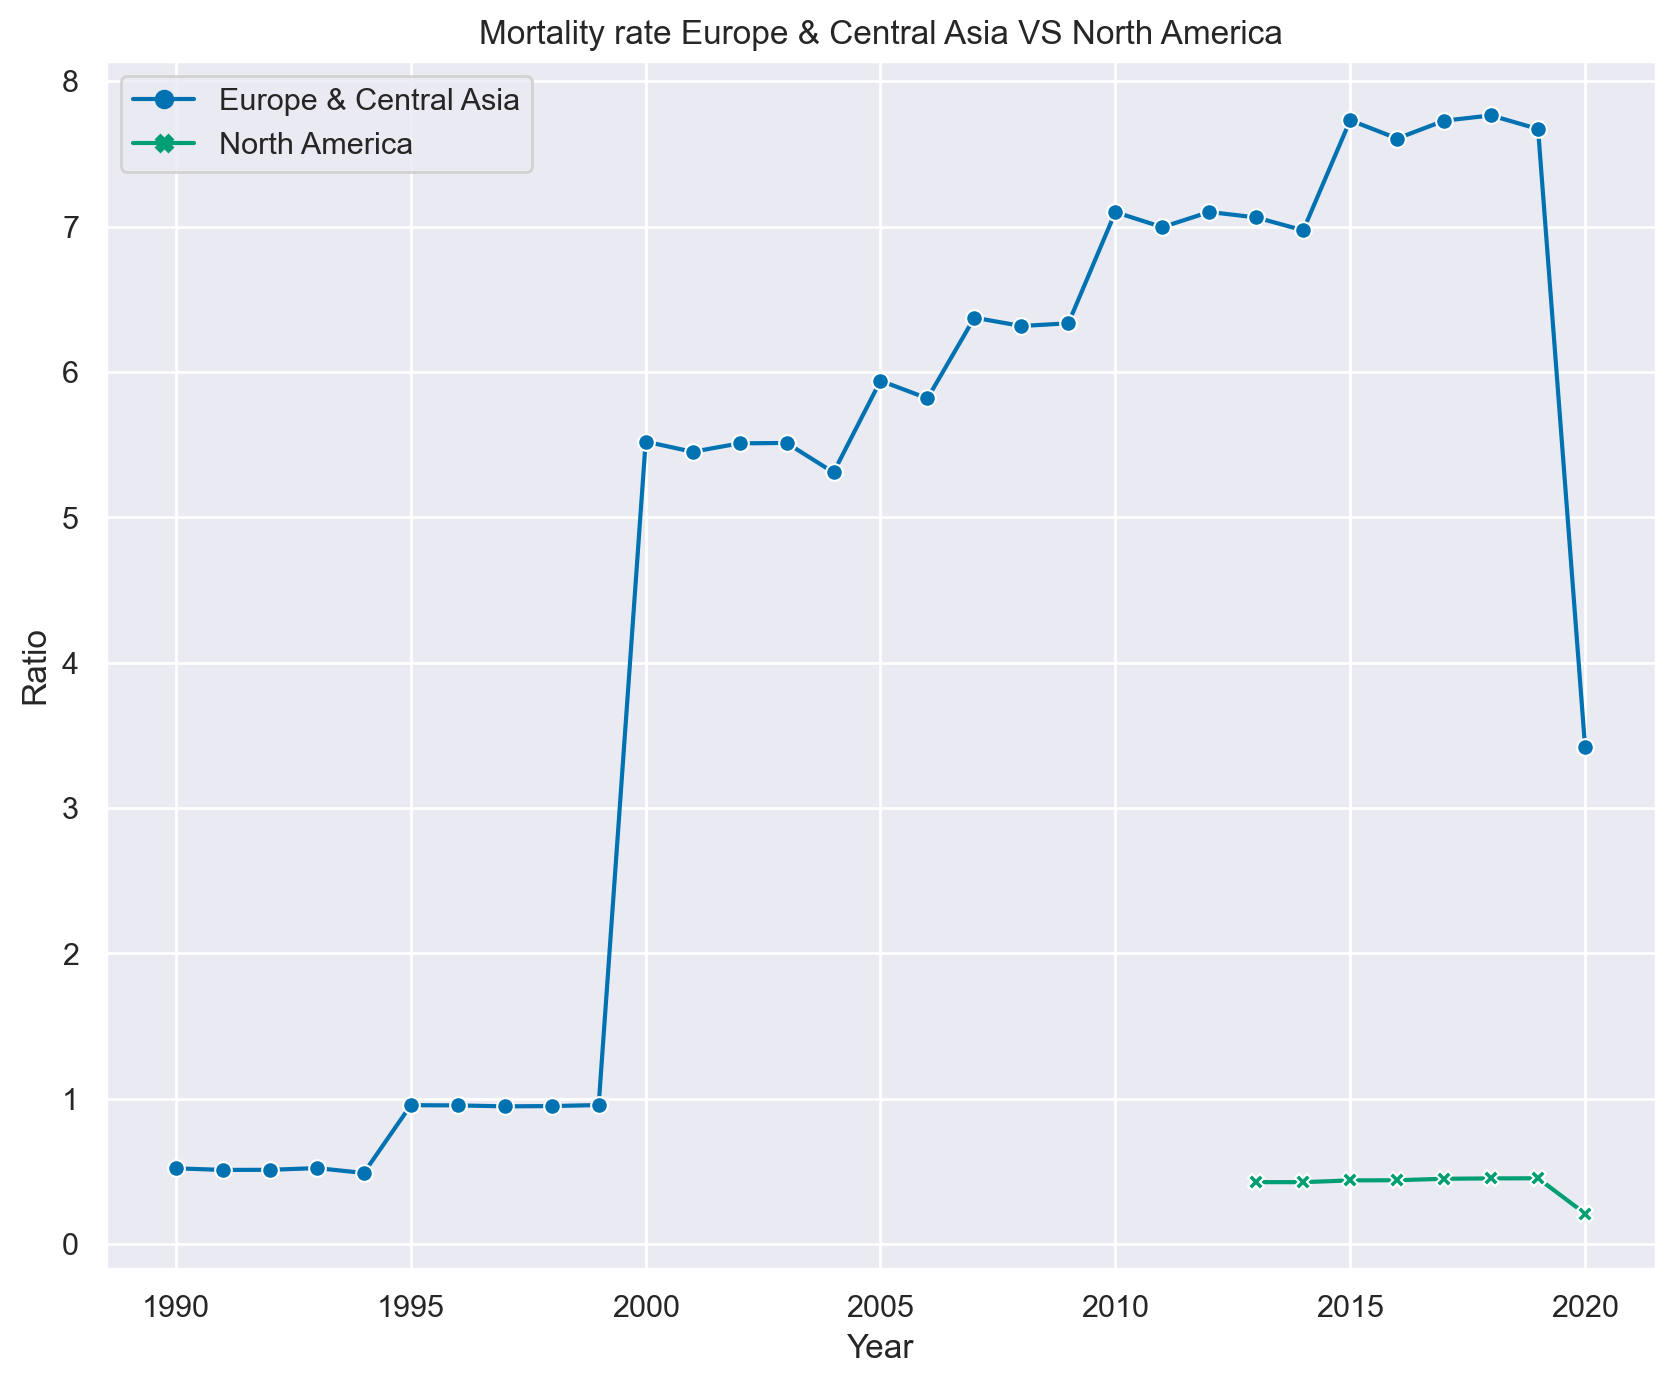

In [425]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortalityregion3 , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Year')
ax.set_ylabel('Ratio')
ax.set_title("Mortality rate Europe & Central Asia VS North America")

In [182]:
mortalitycohort = mortality[['countrycode', 'Year','Sex', 'R0_14', 'R15_64', 'R65_74', 'R75_84'
                             , 'R85p']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])

In [184]:
mortalitycohort2 = mortalitycohort.loc[mortalitycohort.Sex=='b']

In [185]:
### USA

In [193]:
mortaily_region1= mortalitycohort2.loc[mortalitycohort2.region=='North America']
mortaily_region1 =mortaily_region1.drop(columns=['countrycode','region','Sex']) 
mortaily_region1

,Year,R0_14,R15_64,R65_74,R75_84,R85p
44321,2013,0.000539,0.003426,0.022152,0.056910,0.170108
44324,2013,0.000547,0.003445,0.022779,0.058522,0.174927
44327,2013,0.000521,0.003339,0.022201,0.057038,0.170490
...,...,...,...,...,...,...
45470,2020,0.000381,0.003331,0.017655,0.043337,0.138040
45473,2020,0.000335,0.002982,0.015548,0.038164,0.121564
45476,2020,0.000233,0.002263,0.012401,0.030439,0.096957


In [195]:
mortaily_region1 = mortaily_region1.pivot_table(index='Year', aggfunc='sum')

Text(0.5, 1.0, 'Mortality rate - North America')

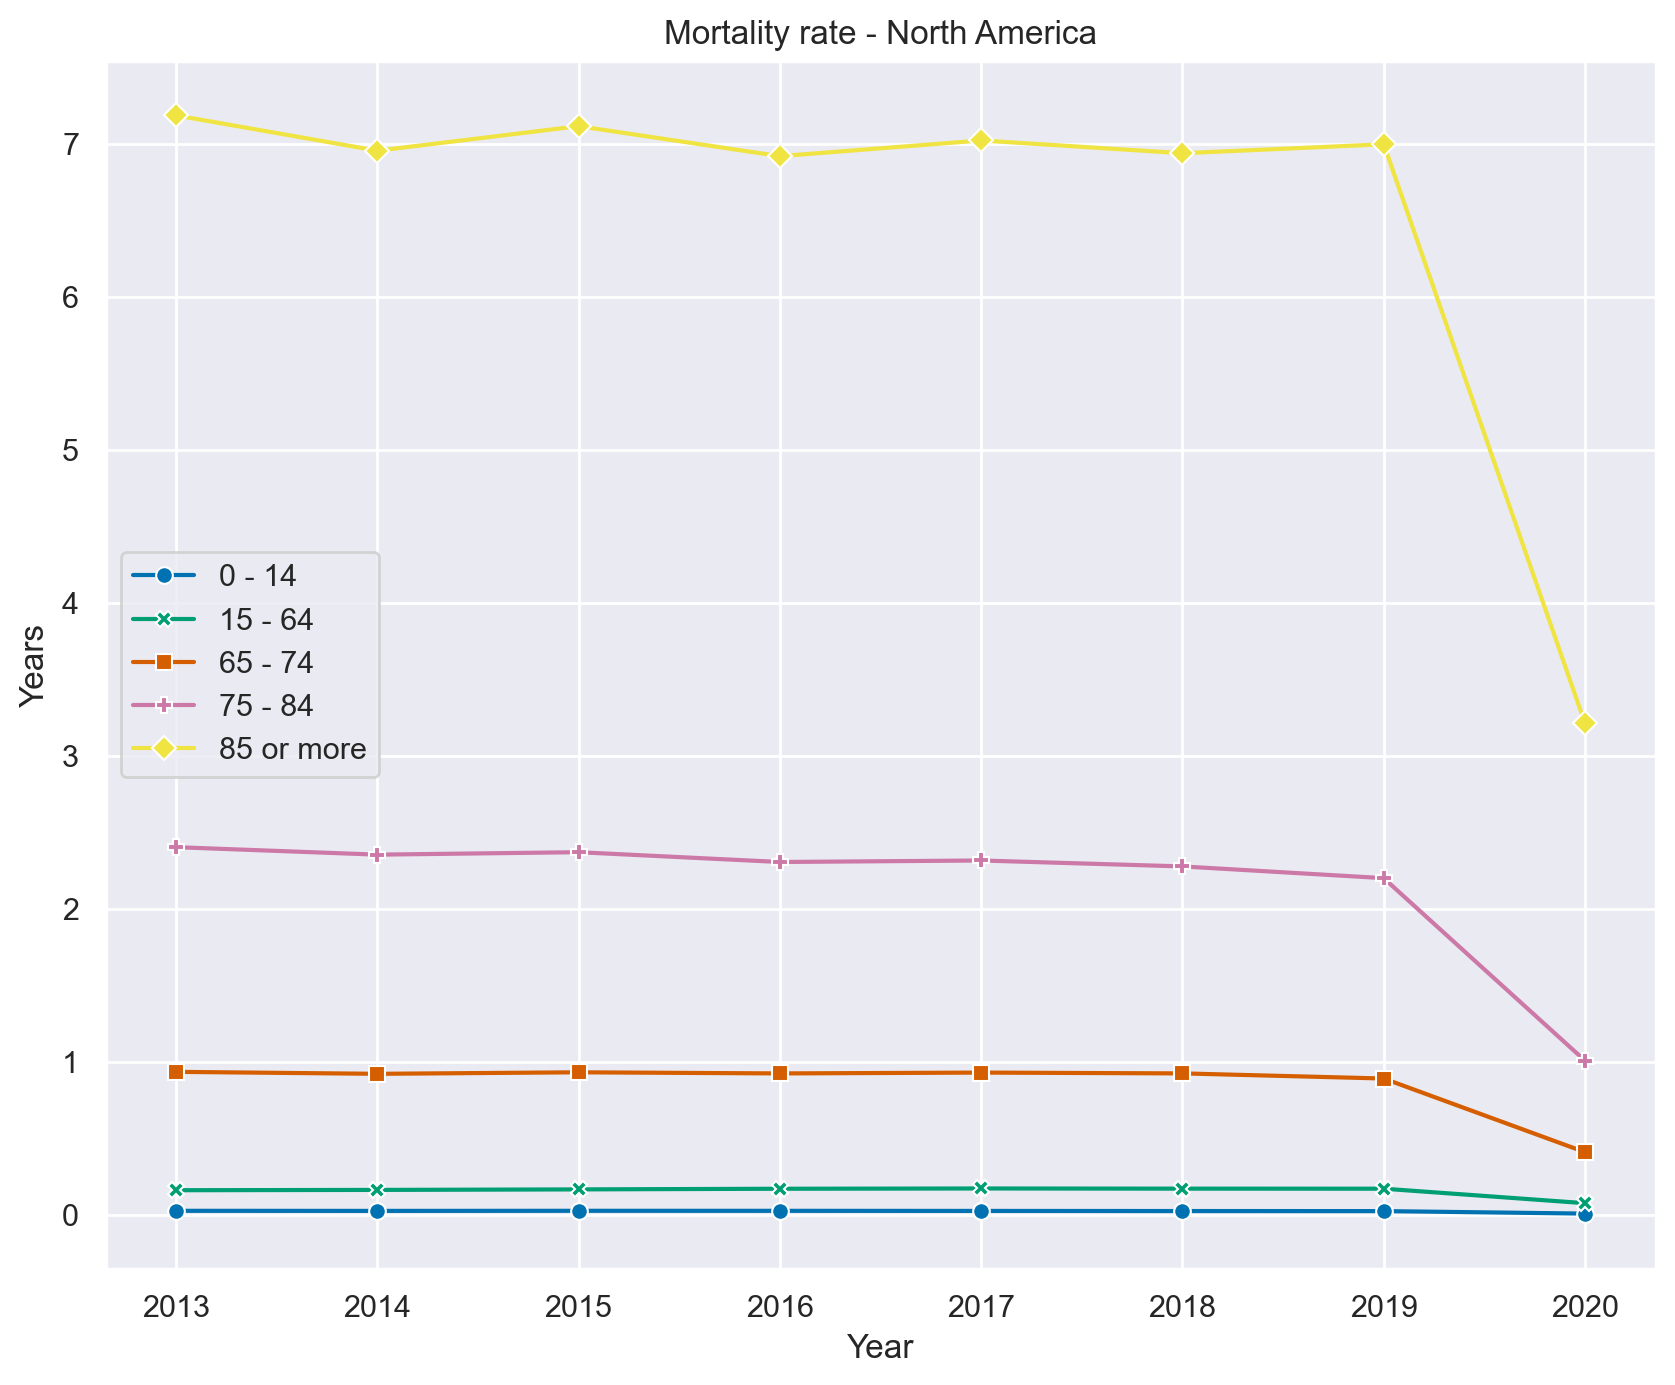

In [462]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortaily_region1 , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['0 - 14','15 - 64','65 - 74','75 - 84', '85 or more'])
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.set_title("Mortality rate - North America")

In [206]:
mortaily_easia = mortalitycohort2.loc[mortalitycohort2.region=='Europe & Central Asia']
mortaily_easia =mortaily_easia.drop(columns=['countrycode','region','Sex']) 

In [207]:
mortaily_easia = mortaily_easia.pivot_table(index='Year', aggfunc='sum')

### 5. Using this data analyze the convergence of life expectanty, mortality and fertility.

In [427]:
worldp = world1
worldp.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldp.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldp.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)

In [428]:
worldp1960 = worldp.drop(worldp[worldp.Year != 1960].index)

worldp1970 = worldp.drop(worldp[worldp.Year != 1970].index)

worldp1980 = worldp.drop(worldp[worldp.Year != 1980].index)

worldp1990 = worldp.drop(worldp[worldp.Year != 1990].index)

worldp2000 = worldp.drop(worldp[worldp.Year != 2000].index)

worldp2010 = worldp.drop(worldp[worldp.Year != 2010].index)

worldp2018 = worldp.drop(worldp[worldp.Year != 2018].index)

Text(0, 0.5, 'Countries Density')

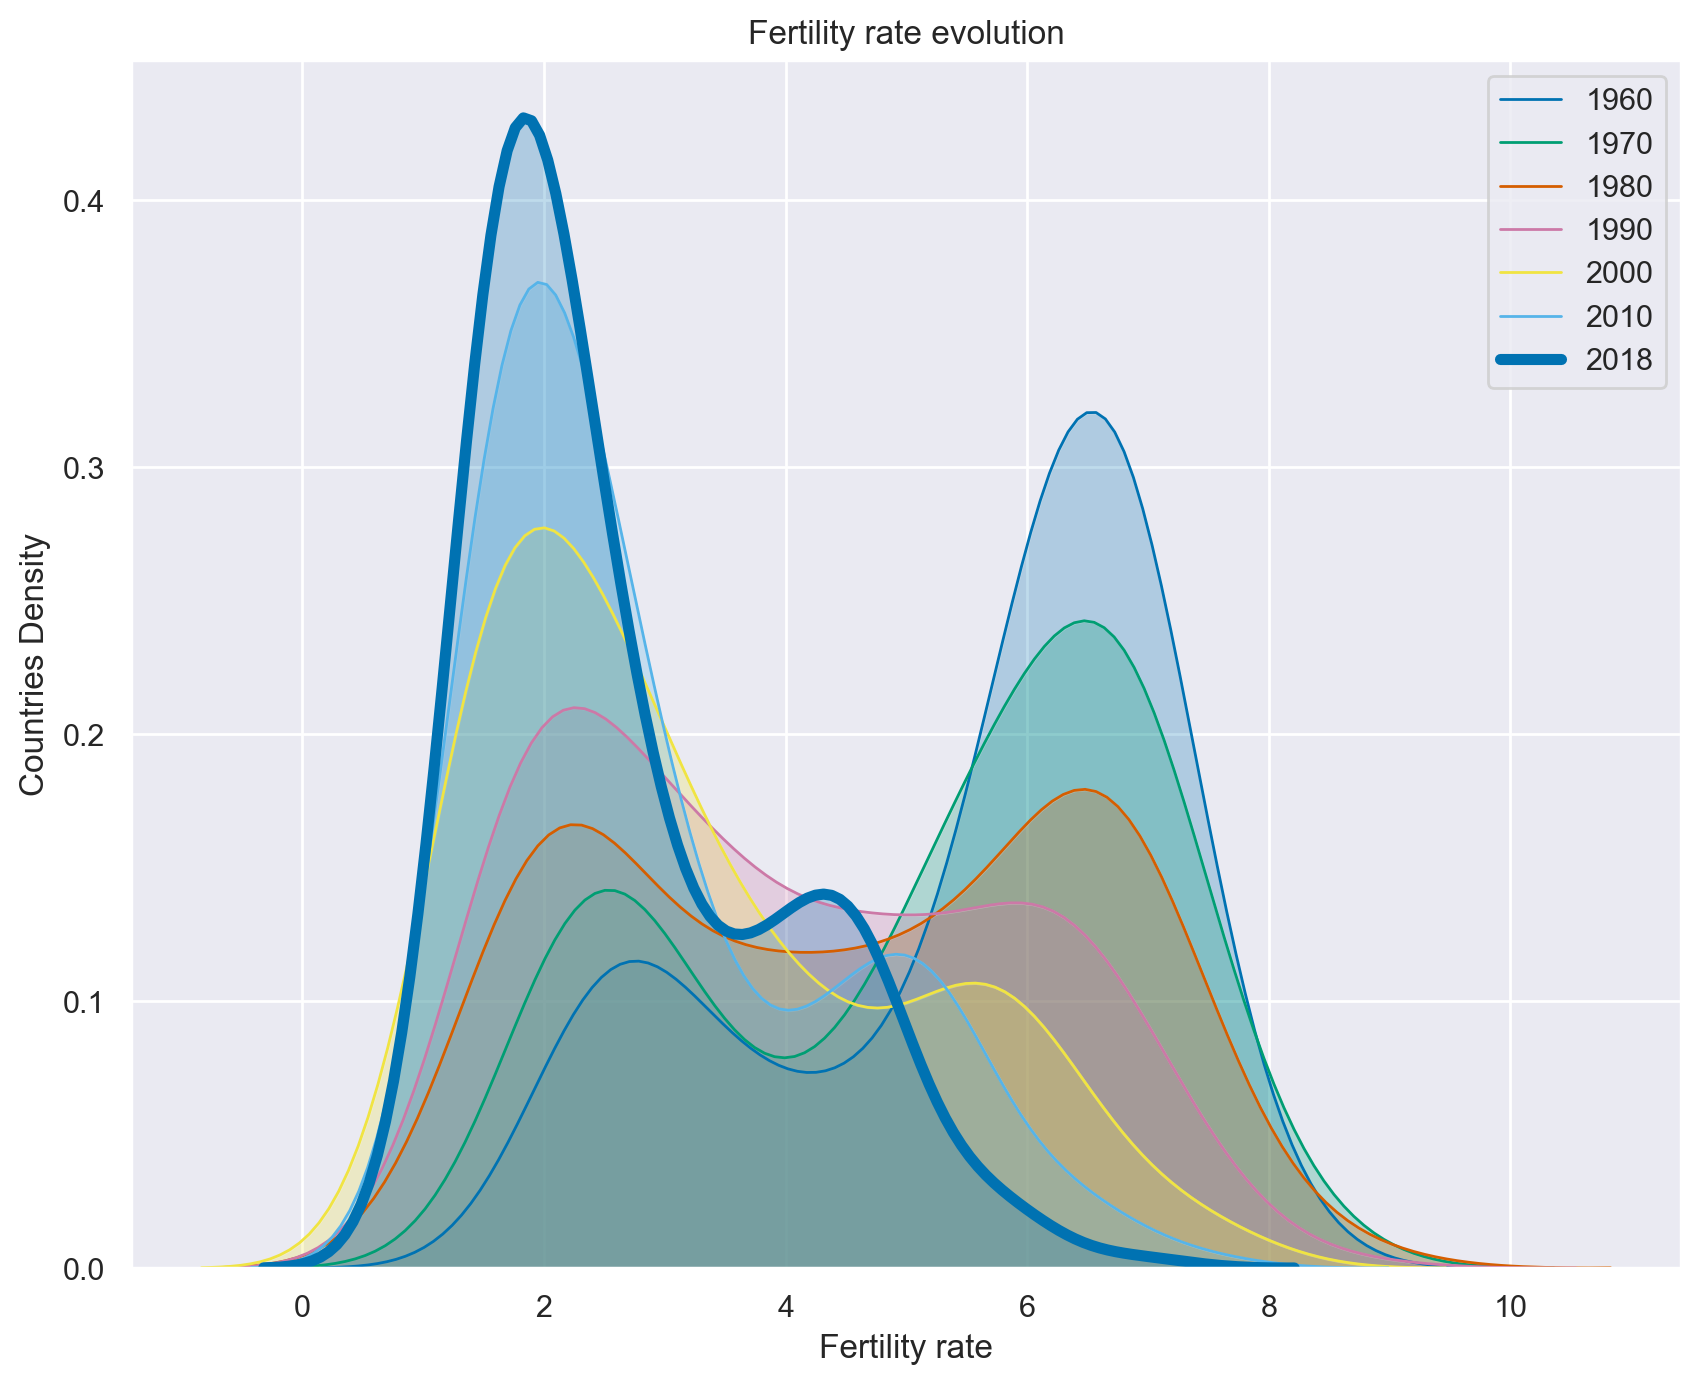

In [459]:

fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.kdeplot(worldp1960.fertility, ax=ax, shade=True, label='1960', linewidth=1)


sns.kdeplot(worldp1970.fertility, ax=ax, shade=True, label='1970', linewidth=1)


sns.kdeplot(worldp1980.fertility, ax=ax, shade=True, label='1980', linewidth=1)

sns.kdeplot(worldp1990.fertility, ax=ax, shade=True, label='1990', linewidth=1)


sns.kdeplot(worldp2000.fertility, ax=ax, shade=True, label='2000', linewidth=1)

sns.kdeplot(worldp2010.fertility, ax=ax, shade=True, label='2010', linewidth=1)


sns.kdeplot(worldp2018.fertility, ax=ax, shade=True, label='2018', linewidth=4)
ax.set_title("Fertility rate evolution")
ax.set_xlabel('Fertility rate')
ax.set_ylabel('Countries Density')



Text(0, 0.5, 'Countries Density')

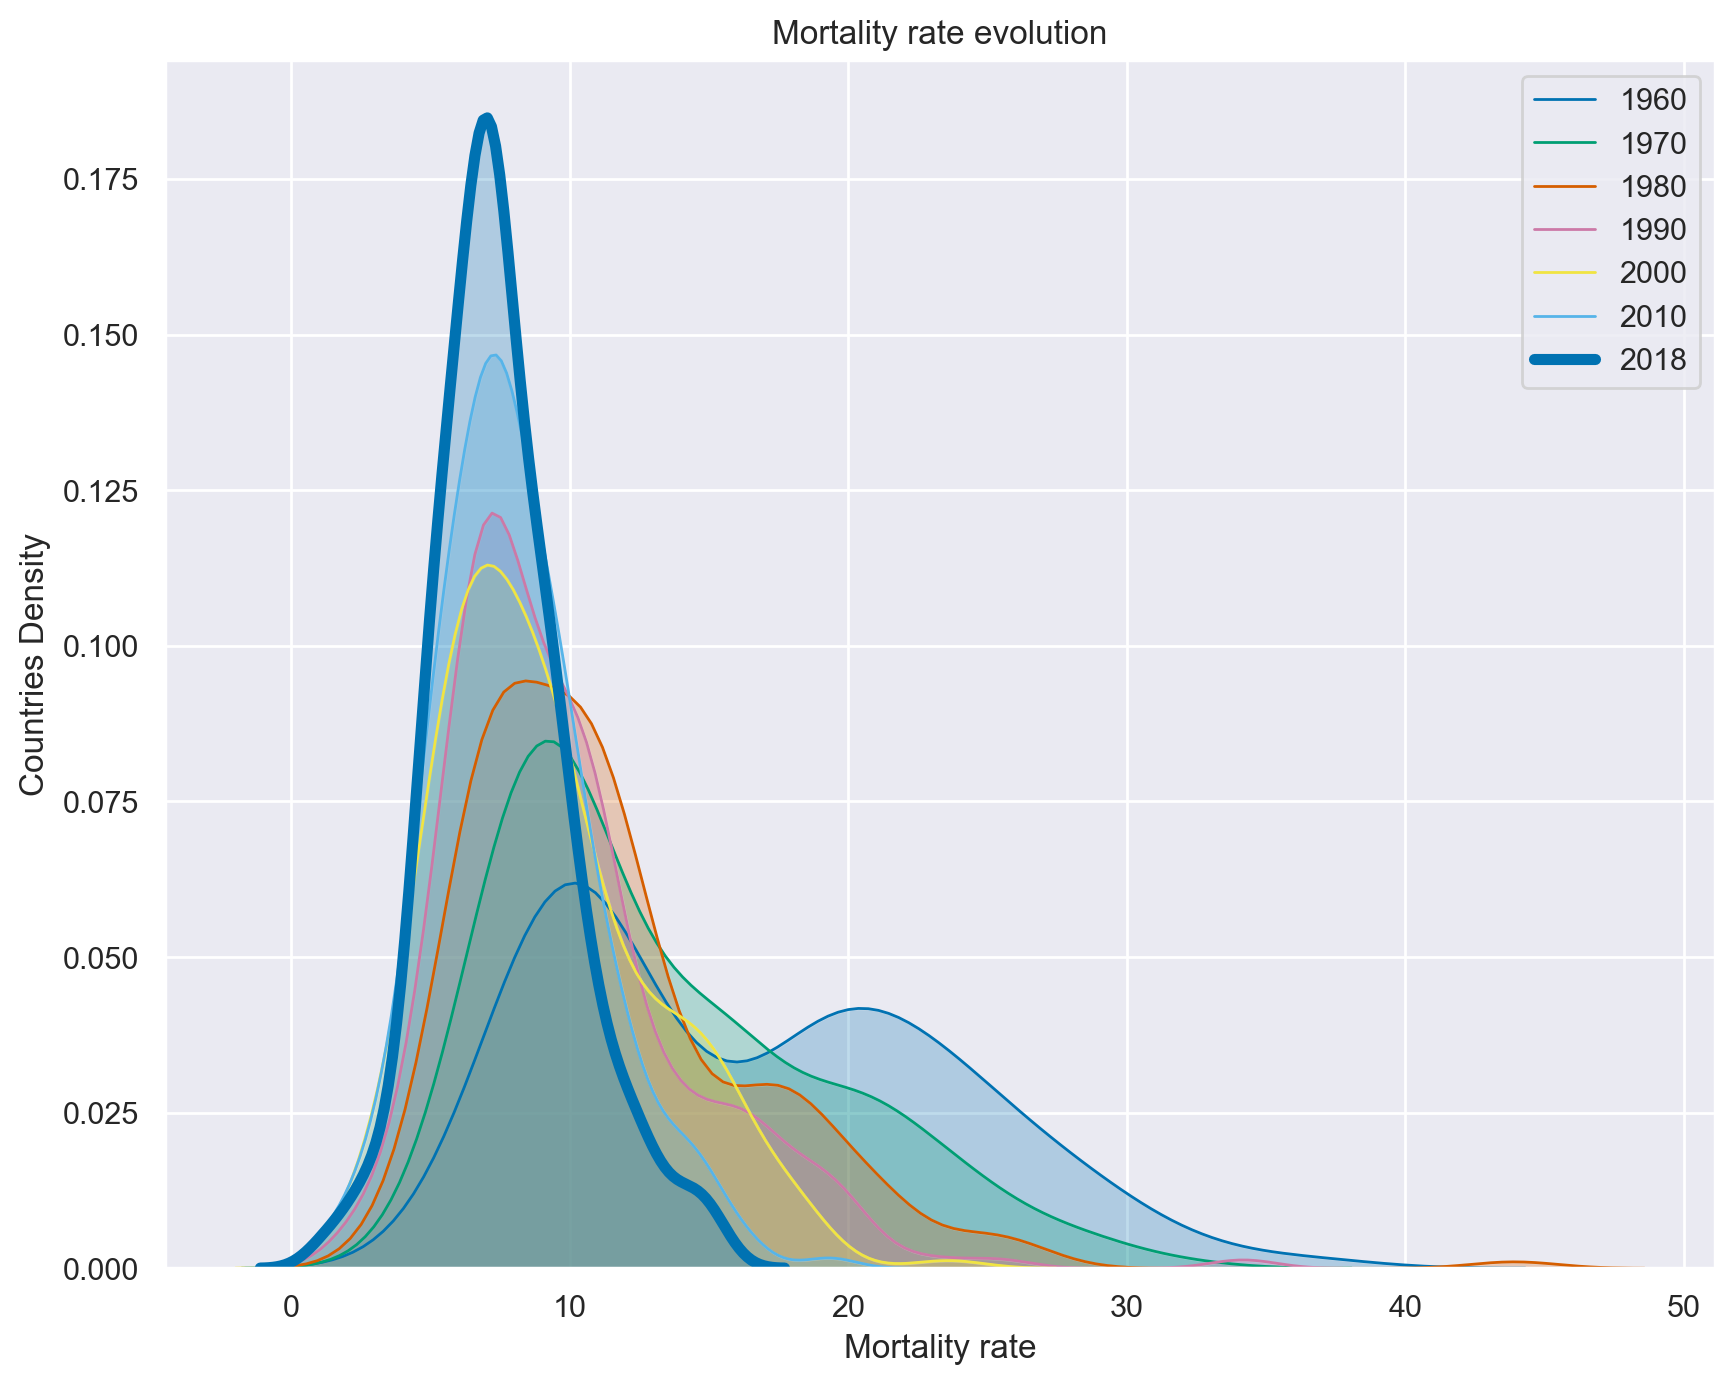

In [457]:


fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.kdeplot(worldp1960.mortality, ax=ax, shade=True, label='1960', linewidth=1)


sns.kdeplot(worldp1970.mortality, ax=ax, shade=True, label='1970', linewidth=1)


sns.kdeplot(worldp1980.mortality, ax=ax, shade=True, label='1980', linewidth=1)

sns.kdeplot(worldp1990.mortality, ax=ax, shade=True, label='1990', linewidth=1)


sns.kdeplot(worldp2000.mortality, ax=ax, shade=True, label='2000', linewidth=1)

sns.kdeplot(worldp2010.mortality, ax=ax, shade=True, label='2010', linewidth=1)


sns.kdeplot(worldp2018.mortality, ax=ax, shade=True, label='2018', linewidth=4)
ax.set_title("Mortality rate evolution")
ax.set_xlabel('Mortality rate')
ax.set_ylabel('Countries Density')



Text(0, 0.5, 'Countries Density')

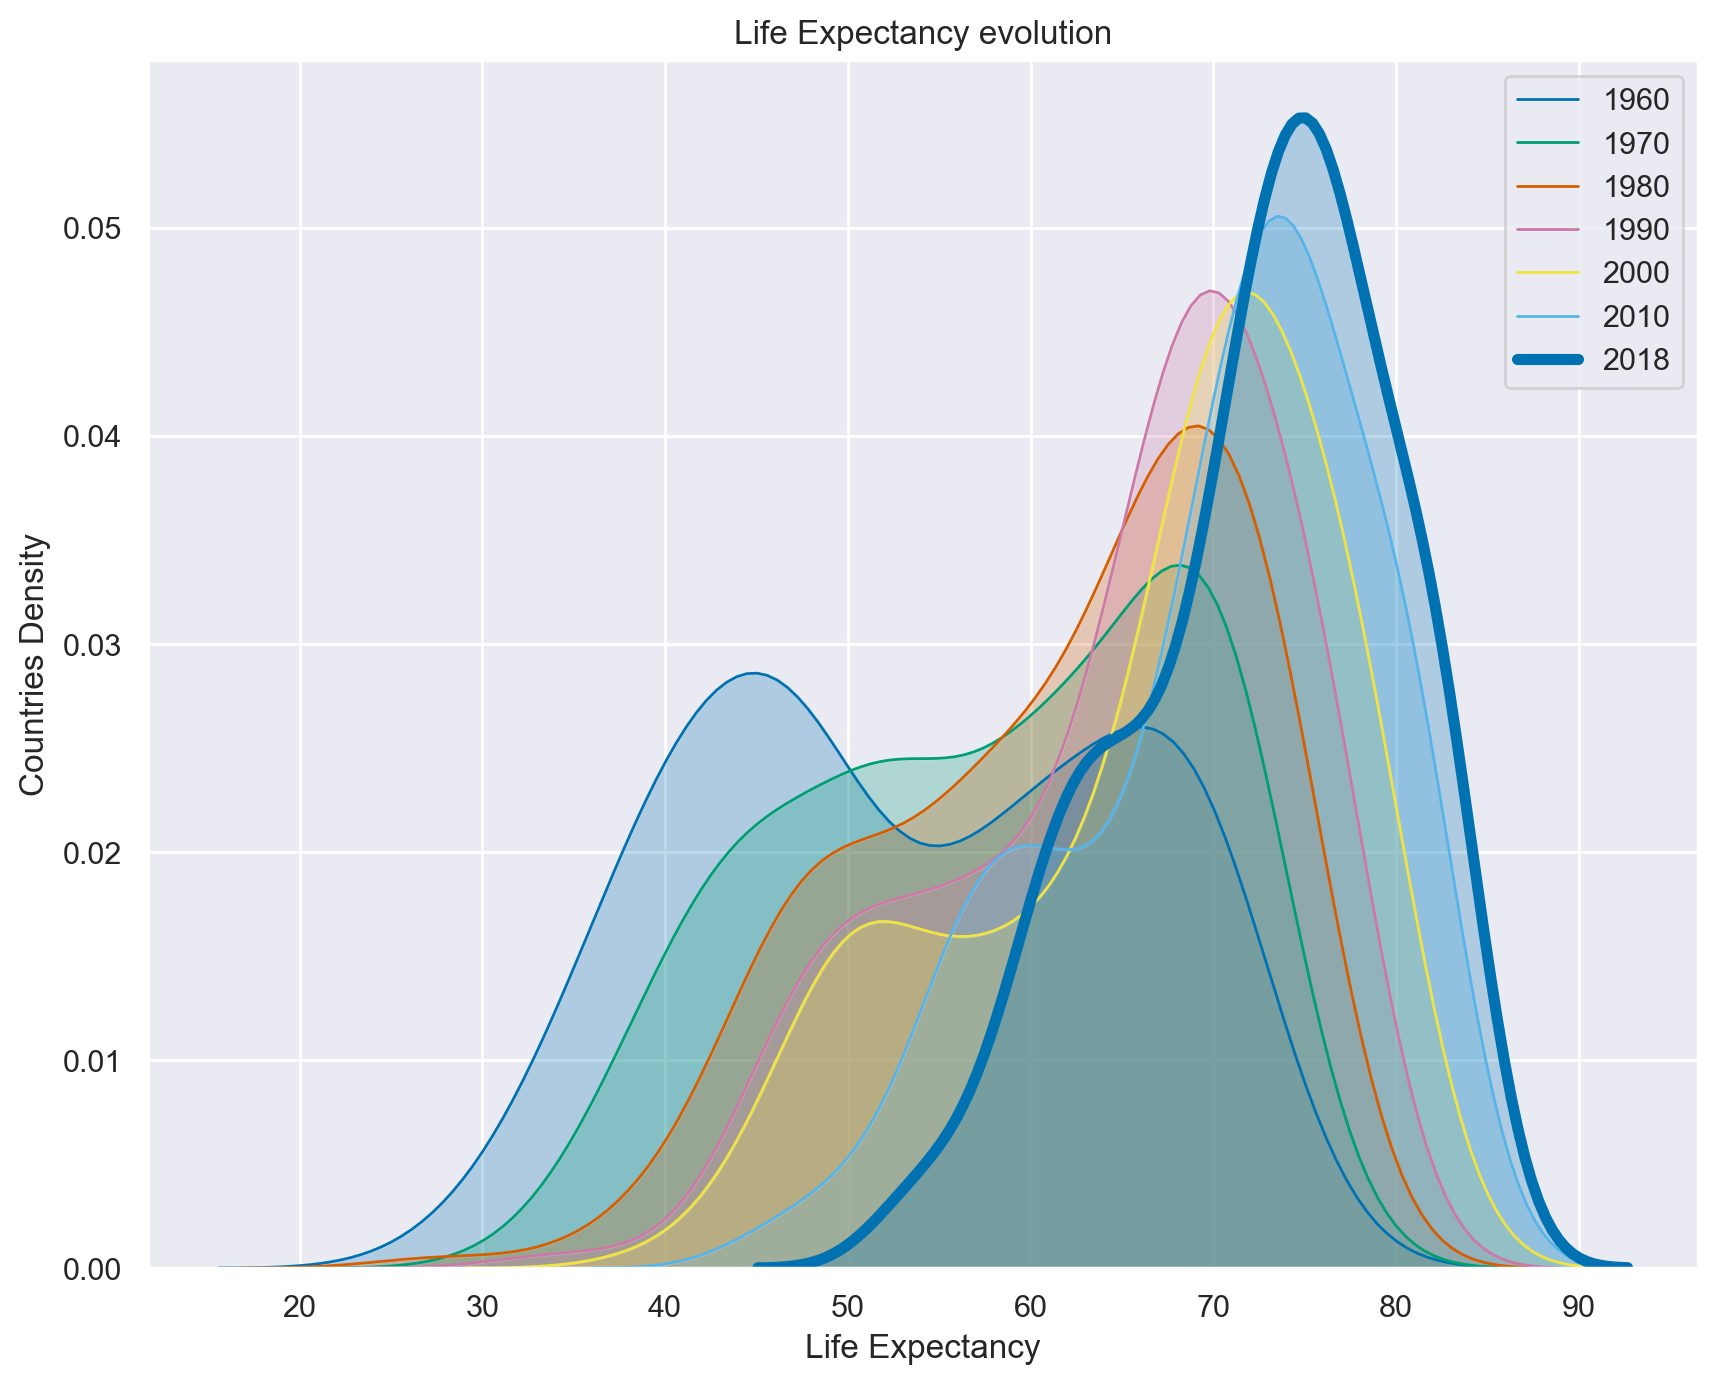

In [458]:

fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.kdeplot(worldp1960.lifeex, ax=ax, shade=True, label='1960', linewidth=1)

sns.kdeplot(worldp1970.lifeex, ax=ax, shade=True, label='1970', linewidth=1)

sns.kdeplot(worldp1980.lifeex, ax=ax, shade=True, label='1980', linewidth=1)

sns.kdeplot(worldp1990.lifeex, ax=ax, shade=True, label='1990', linewidth=1)

sns.kdeplot(worldp2000.lifeex, ax=ax, shade=True, label='2000', linewidth=1)

sns.kdeplot(worldp2010.lifeex, ax=ax, shade=True, label='2010', linewidth=1)


sns.kdeplot(worldp2018.lifeex, ax=ax, shade=True, label='2018', linewidth=4)
ax.set_title("Life Expectancy evolution")
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Countries Density')
